In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import v_measure_score
import time
import tqdm

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'chest']
datas_full_name = ["miniImageNet_test", "CropDisease", "EuroSAT", "ISIC", "ChestX"]
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

colors = ["#FF0000", "#FFBB00", "#00B700" , "#0100FF", "#8324FF", # vivid 빨노초파보
          "#ED9595", "#EDCE7A", "#86E57F", "#6799FF", "#BFA0ED"] # pale
source_colors = ["#FF0000", "#FFBB00", "#00B700" , "#0100FF", "#8324FF", 
          "#FF00DD", "#00C6ED", "#670000", "#6B9900", "#353535"]

import matplotlib
myfonts = "Times New Roman"
#matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts

['Times New Roman']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc



miniImageNet_test

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.934743


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.554626
[t-SNE] KL divergence after 1000 iterations: 0.802686

CropDisease



/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.031918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.354553
[t-SNE] KL divergence after 1000 iterations: 0.528695

EuroSAT



/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.304763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.671322
[t-SNE] KL divergence after 850 iterations: 0.577213

ISIC

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.006s...


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.100439
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.717300
[t-SNE] KL divergence after 950 iterations: 0.513266

ChestX



/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 2.293398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.401573
[t-SNE] KL divergence after 1000 iterations: 0.685489


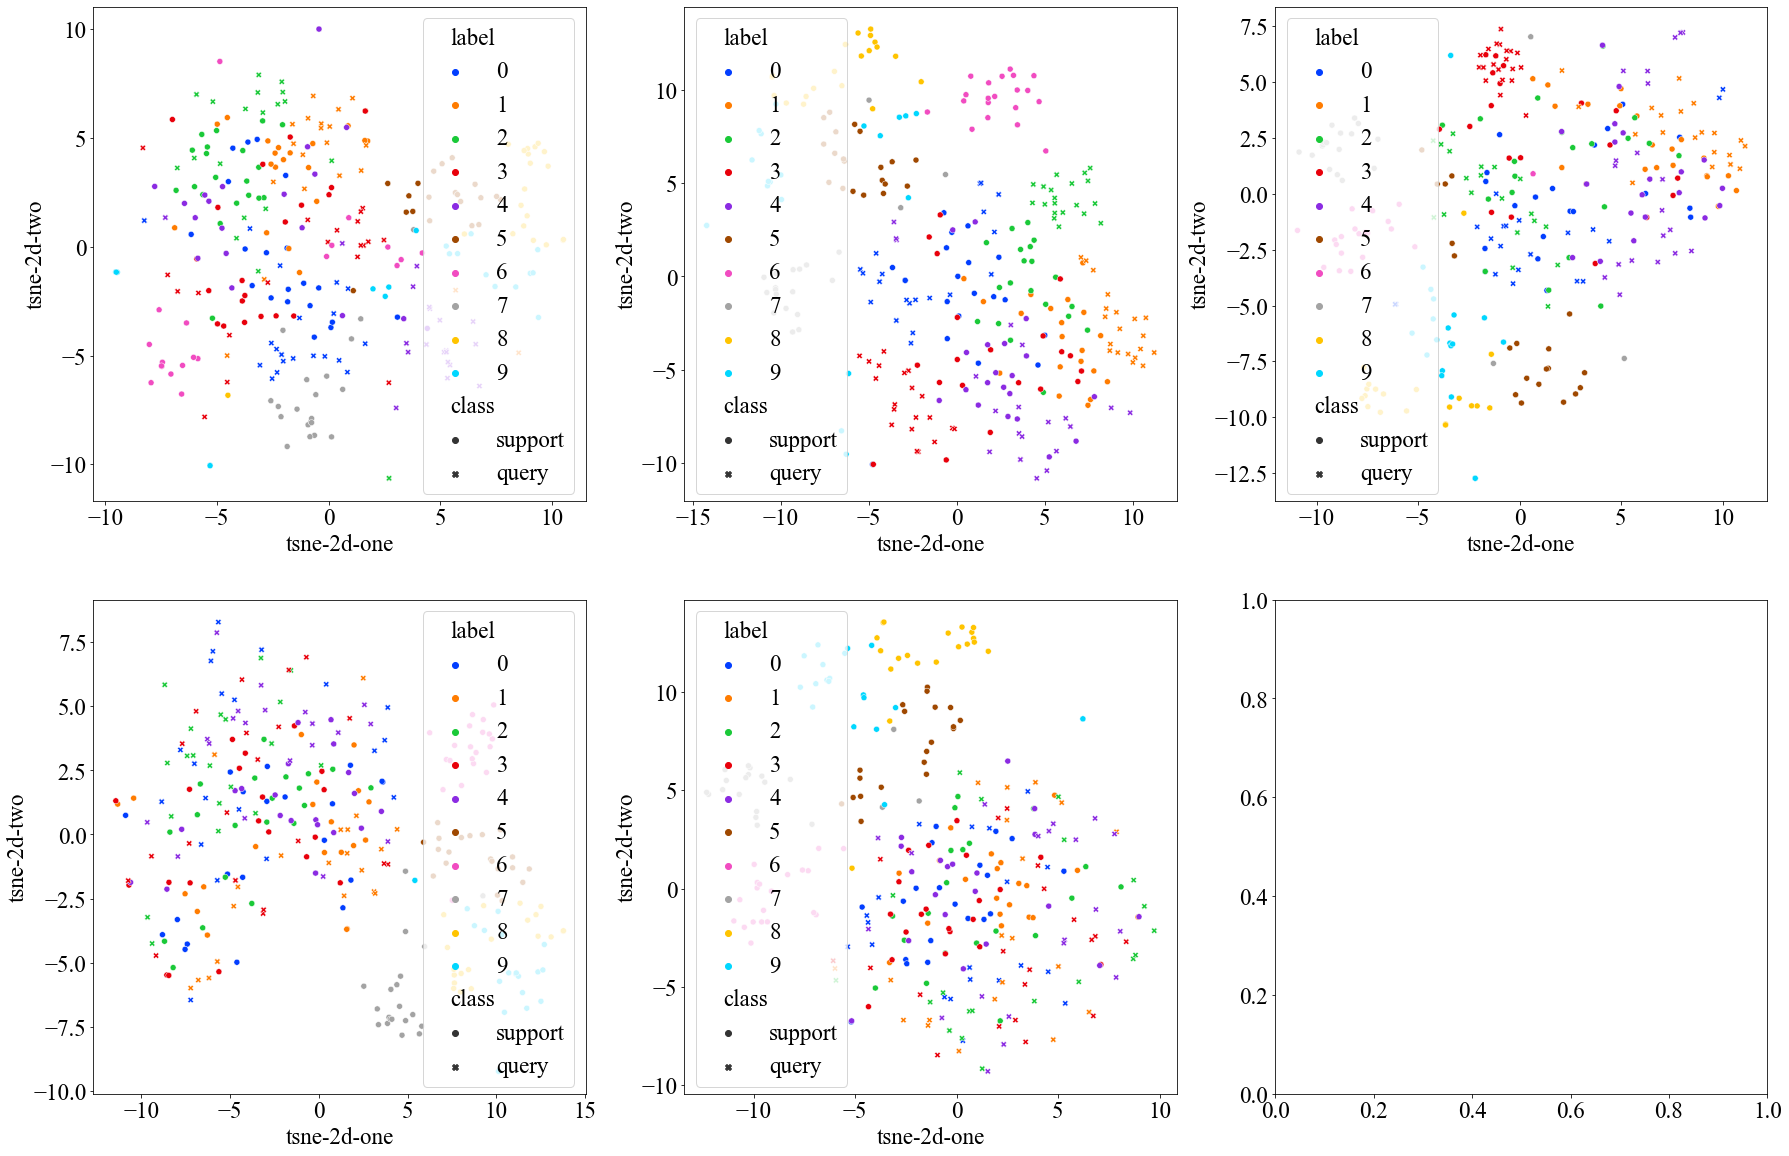

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [199]:
#f, axes = plt.subplots(2,3, figsize=(30,20))
row=0
col=0
for data in datas_full_name: 
    print("\n{}\n".format(data))
    # source
    source_feature_path = './feature/miniImageNet/baseline/source_df.csv'
    df_source = pd.read_csv(source_feature_path, index_col='Unnamed: 0')
    df_source.columns = list(range(512))
    df_source['label'] = np.repeat(np.arange(5, 10), 20)
    df_source['class'] = 'support'

    # clean support 
    df_support = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    support_feature_path = './feature/{}/baseline/support.npy'.format(data)
    support_feature = np.load(support_feature_path)
    for i in range(1, 101):
        df_support.loc[i,:] = support_feature[i-1]
    df_support['label'] = np.repeat(np.arange(5), 20)
    df_support['class'] = 'support'

    # query
    df_query = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    query_feature_path = './feature/{}/baseline/query.npy'.format(data)
    query_feature = np.load(query_feature_path)
    for i in range(1, 101):
        df_query.loc[i,:] = query_feature[i-1]
    df_query['label'] = np.repeat(np.arange(5), 20)
    df_query['class'] = 'query'

    # mixup
    df_mixup = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    mixup_feature_path = './feature/{}/mixup/support.npy'.format(data)
    mixup_feature = np.load(mixup_feature_path)
    for i in range(1, 101):
        df_mixup.loc[i,:] = mixup_feature[i-1]
    df_mixup['label'] = np.repeat(np.arange(5), 20)
    df_mixup['class'] = 'support'

    # cutmix
    df_cutmix = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    cutmix_feature_path = './feature/{}/cutmix/support.npy'.format(data)
    cutmix_feature = np.load(cutmix_feature_path)
    for i in range(1, 101):
        df_cutmix.loc[i,:] = cutmix_feature[i-1]
    df_cutmix['label'] = np.repeat(np.arange(5), 20)
    df_cutmix['class'] = 'target'

    # flip
    df_flip = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    flip_feature_path = './feature/{}/flip/support.npy'.format(data)
    flip_feature = np.load(flip_feature_path)
    for i in range(1, 101):
        df_flip.loc[i,:] = flip_feature[i-1]
    df_flip['label'] = np.repeat(np.arange(5), 20)
    df_flip['class'] = 'target'
    
    # crop
    df_crop = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    crop_feature_path = './feature/{}/crop/support.npy'.format(data)
    crop_feature = np.load(crop_feature_path)
    for i in range(1, 101):
        df_crop.loc[i,:] = crop_feature[i-1]
    df_crop['label'] = np.repeat(np.arange(5), 20)
    df_crop['class'] = 'target'
    
    df = pd.concat([df_mixup, df_query, df_source], axis=0, join='inner')
    data_subset = df.iloc[:, :512].values
    data_subset.shape
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)
    
    df['x'] = tsne_results[:,0]
    df['y'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=sns.color_palette("bright", 10), 
        style = "class",
        data=df,
        #legend="full",
        ax=axes[row,col]
    )
    col=col+1
    if col != col%3:
        row=row + 1
    col = col%3
    
plt.show()

### Domain difference

### Class difference

In [ ]:
#f, axes = plt.subplots(2,3, figsize=(30,20))
row=0
col=0
for data in datas_full_name: 
    print("\n{}\n".format(data))
    # # source
    # source_feature_path = './feature/miniImageNet/baseline/source_df.csv'
    # df_source = pd.read_csv(source_feature_path, index_col='Unnamed: 0')
    # df_source.columns = list(range(512))
    # df_source['label'] = np.repeat(np.arange(5, 10), 20)
    # df_source['class'] = 'source'

    #clean support 
    df_support = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    support_feature_path = './feature/{}/baseline/support.npy'.format(data)
    support_feature = np.load(support_feature_path)
    for i in range(1, 101):
        df_support.loc[i,:] = support_feature[i-1]
    df_support['label'] = np.repeat(np.arange(5), 20)
    df_support['class'] = 'support'
    df_support['aug'] = 3

    # query
    df_query = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    query_feature_path = './feature/{}/baseline/query.npy'.format(data)
    query_feature = np.load(query_feature_path)
    for i in range(1, 101):
        df_query.loc[i,:] = query_feature[i-1]
    df_query['label'] = np.repeat(np.arange(5,10), 20)
    df_query['class'] = 'query'
    df_query['aug'] = 300

#     # mixup
#     df_mixup = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     mixup_feature_path = './feature/{}/mixup/support.npy'.format(data)
#     mixup_feature = np.load(mixup_feature_path)
#     for i in range(1, 101):
#         df_mixup.loc[i,:] = mixup_feature[i-1]
#     df_mixup['label'] = np.repeat(np.arange(5), 20)
#     df_mixup['class'] = 'support'

#     # cutmix
#     df_cutmix = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     cutmix_feature_path = './feature/{}/cutmix/support.npy'.format(data)
#     cutmix_feature = np.load(cutmix_feature_path)
#     for i in range(1, 101):
#         df_cutmix.loc[i,:] = cutmix_feature[i-1]
#     df_cutmix['label'] = np.repeat(np.arange(5), 20)
#     df_cutmix['class'] = 'target'

    # flip
    df_flip = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    flip_feature_path = './feature/{}/flip/support.npy'.format(data)
    flip_feature = np.load(flip_feature_path)
    for i in range(1, 101):
        df_flip.loc[i,:] = flip_feature[i-1]
    df_flip['label'] = np.repeat(np.arange(5), 20)
    df_flip['class'] = 'support'
    df_flip['aug'] = 400
    
#     # crop
#     df_crop = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     crop_feature_path = './feature/{}/crop/support.npy'.format(data)
#     crop_feature = np.load(crop_feature_path)
#     for i in range(1, 101):
#         df_crop.loc[i,:] = crop_feature[i-1]
#     df_crop['label'] = np.repeat(np.arange(5), 20)
#     df_crop['class'] = 'target'
    
    df = pd.concat([df_flip, df_support, df_query], axis=0, join='inner')
    data_subset = df.iloc[:, :512].values
    data_subset.shape
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)
    
    df['x'] = tsne_results[:,0]
    df['y'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=sns.color_palette(colors), 
        style = "class",
        data=df,
        size = 'aug',
        legend=False,
        #ax=axes[row,col],
    )
    plt.title(data)
    plt.savefig('./img_pdf/tSNE/support_query_diff/flip/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    col=col+1
    if col != col%3:
        row=row + 1
    col = col%3
    plt.show()


miniImageNet_test



/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1380 samples in 0.001s...
[t-SNE] Computed neighbors for 1380 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1380
[t-SNE] Computed conditional probabilities for sample 1380 / 1380
[t-SNE] Mean sigma: 3.423252
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.957642
[t-SNE] KL divergence after 1000 iterations: 1.728461


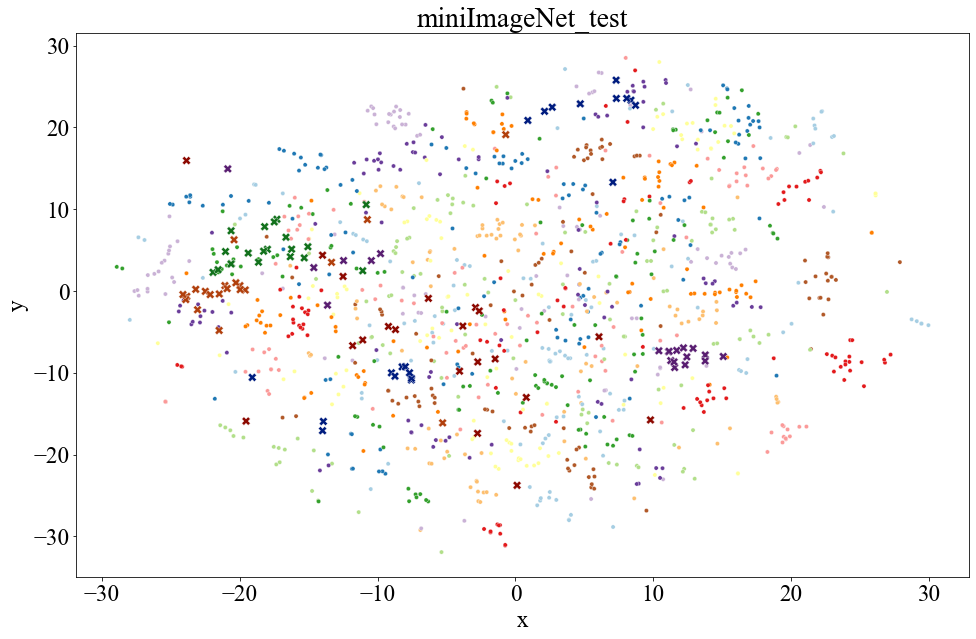


CropDisease

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1380 samples in 0.001s...


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 1380 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1380
[t-SNE] Computed conditional probabilities for sample 1380 / 1380
[t-SNE] Mean sigma: 3.457109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.926872
[t-SNE] KL divergence after 1000 iterations: 1.544141


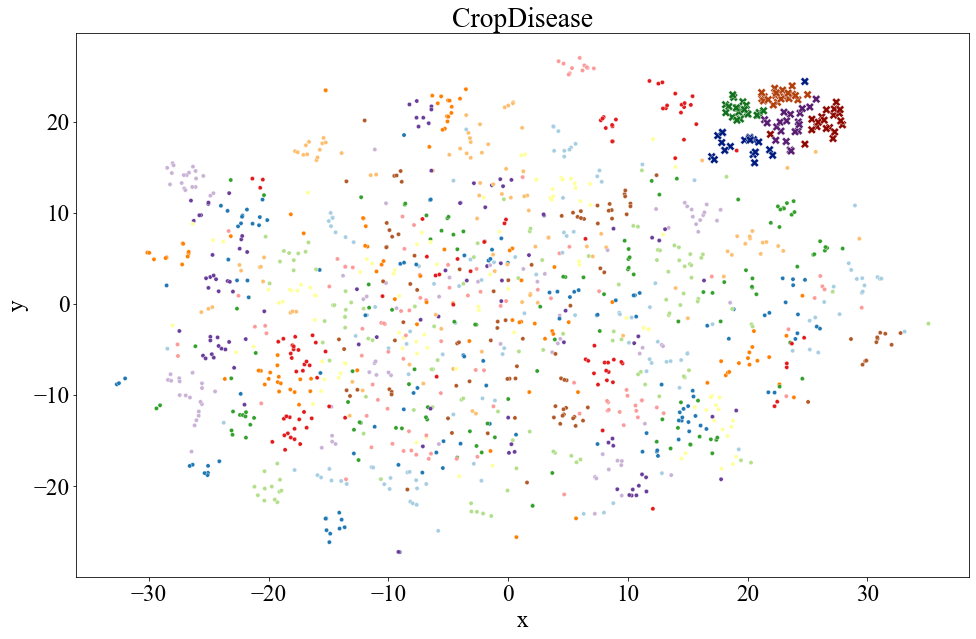


EuroSAT

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1380 samples in 0.001s...


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 1380 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1380
[t-SNE] Computed conditional probabilities for sample 1380 / 1380
[t-SNE] Mean sigma: 3.409832
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.263748
[t-SNE] KL divergence after 1000 iterations: 1.607616


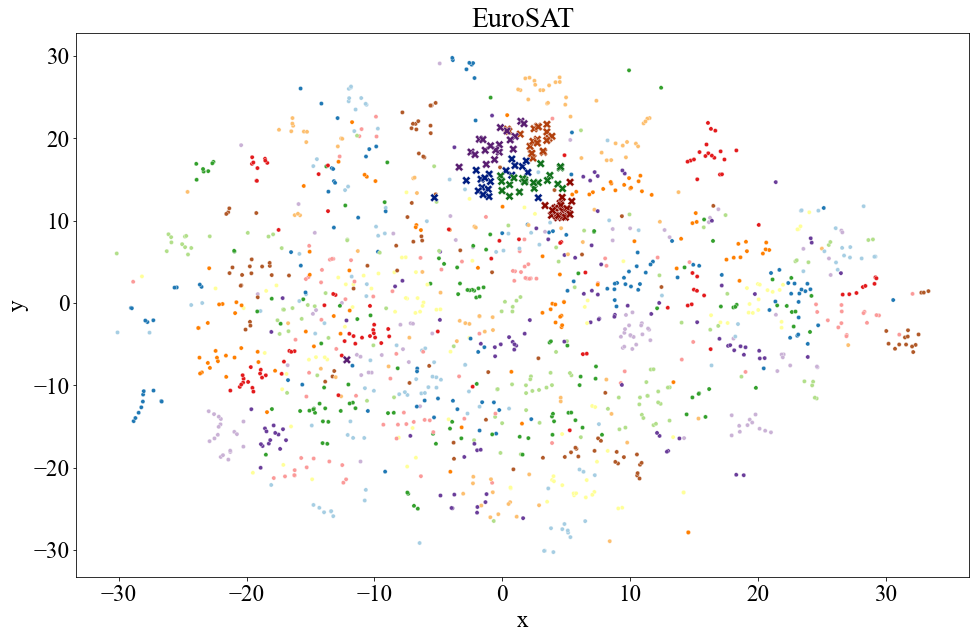


ISIC

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1380 samples in 0.001s...


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 1380 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1380
[t-SNE] Computed conditional probabilities for sample 1380 / 1380
[t-SNE] Mean sigma: 3.465096
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.514145
[t-SNE] KL divergence after 1000 iterations: 1.540888


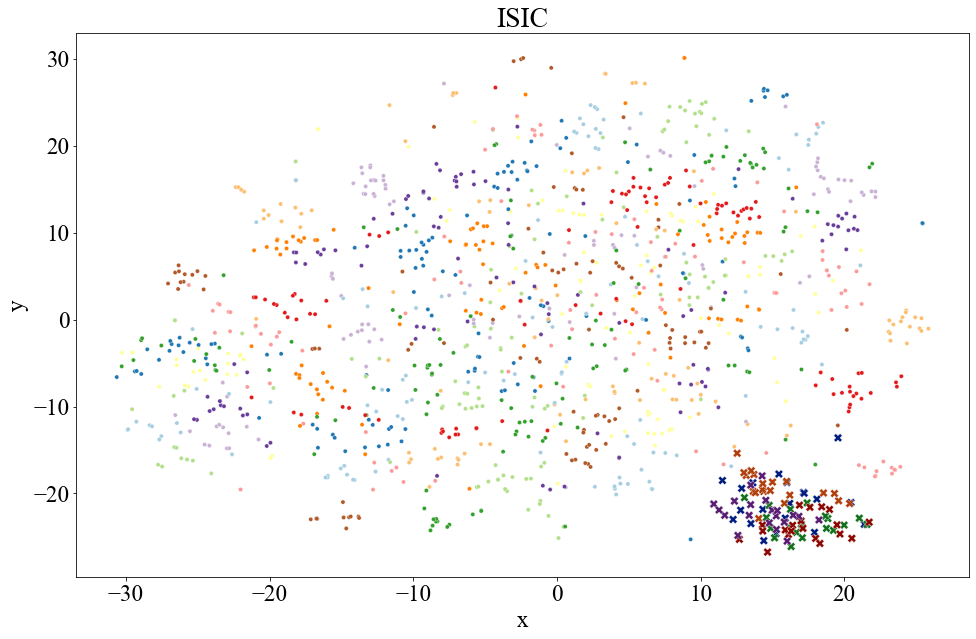


ChestX



/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1380 samples in 0.001s...
[t-SNE] Computed neighbors for 1380 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1380
[t-SNE] Computed conditional probabilities for sample 1380 / 1380
[t-SNE] Mean sigma: 3.283498
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.149620
[t-SNE] KL divergence after 1000 iterations: 1.619499


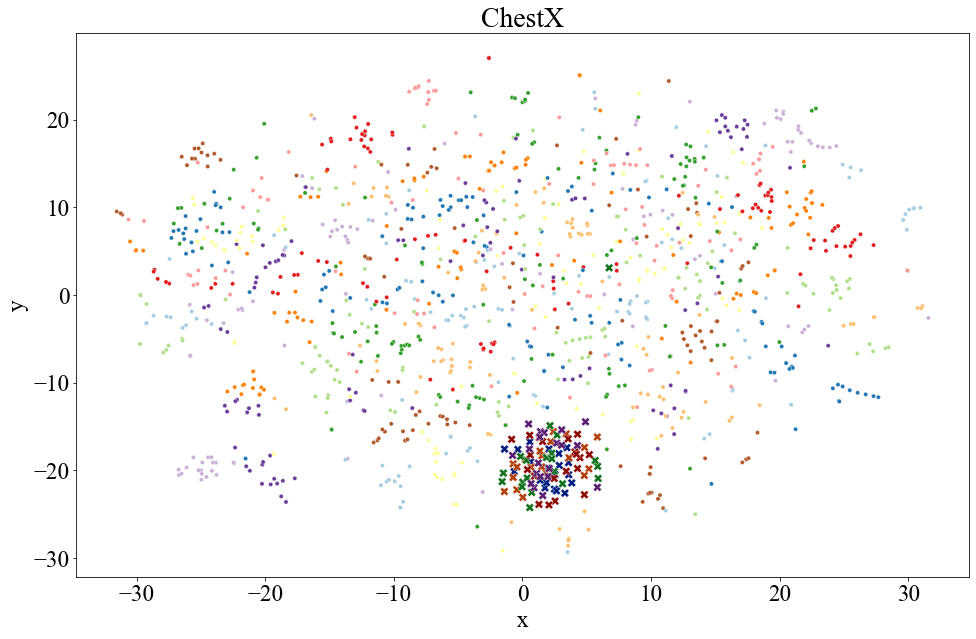

In [292]:
#f, axes = plt.subplots(2,3, figsize=(30,20))
row=0
col=0
for data in datas_full_name: 
    print("\n{}\n".format(data))
    # source
    source_feature_path = './feature/miniImageNet/baseline/source_all_df.csv'
    df_source = pd.read_csv(source_feature_path, index_col='Unnamed: 0')
    df_source.columns = list(range(512))
    df_source['label'] = np.repeat(np.arange(0, 64), 20)
    df_source['class'] = 30

    #clean support 
    df_support = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    support_feature_path = './feature/{}/baseline/support.npy'.format(data)
    support_feature = np.load(support_feature_path)
    for i in range(1, 101):
        df_support.loc[i,:] = support_feature[i-1]
    df_support['label'] = np.repeat(np.arange(64, 69), 20)
    df_support['class'] = 50

    #     # query
    #     df_query = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    #     query_feature_path = './feature/{}/baseline/query.npy'.format(data)
    #     query_feature = np.load(query_feature_path)
    #     for i in range(1, 101):
    #         df_query.loc[i,:] = query_feature[i-1]
    #     df_query['label'] = np.repeat(np.arange(5,10), 20)
    #     df_query['class'] = 'query'
    #     df_query['aug'] = 300

    df = pd.concat([df_source, df_support], axis=0, join='inner')
    data_subset = df.iloc[:, :512].values

    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)

    df['x'] = tsne_results[:,0]
    df['y'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=list(sns.color_palette("Paired", 64)) + list(sns.color_palette("dark", 5)), 
        style = "class",
        data=df,
        size = 'class',
        legend=False,
        #ax=axes[row,col],
    )
    plt.title(data)
    #plt.savefig('./img_pdf/tSNE/support_query_diff/flip/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    col=col+1
    if col != col%3:
        row=row + 1
    col = col%3
    plt.show()


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


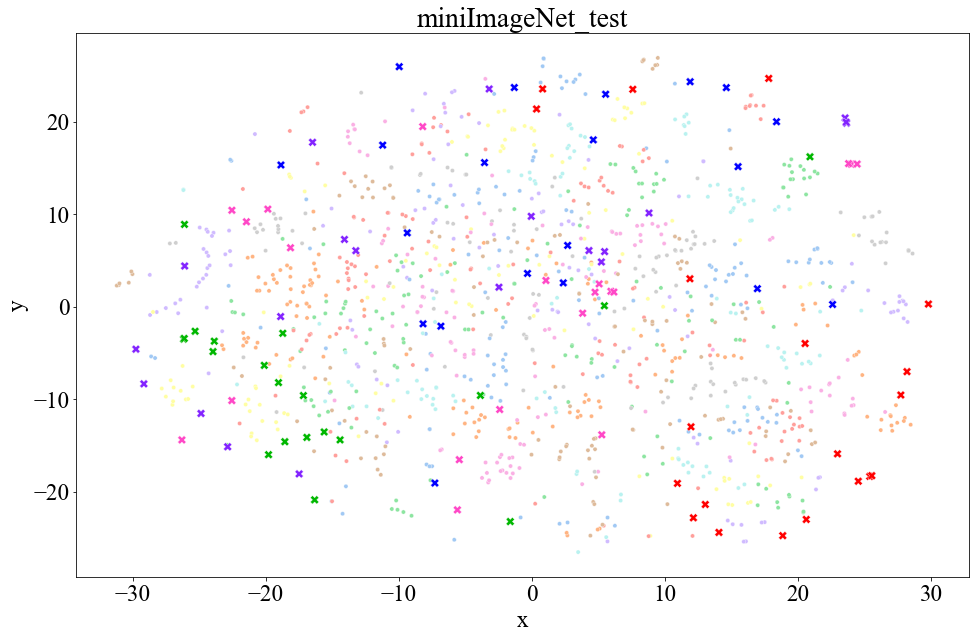

/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


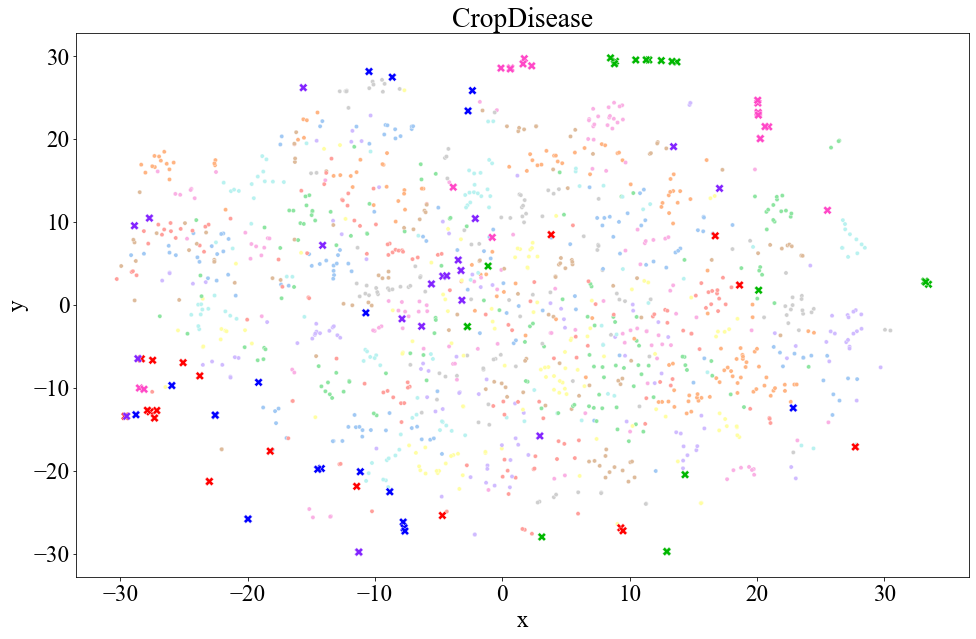

/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


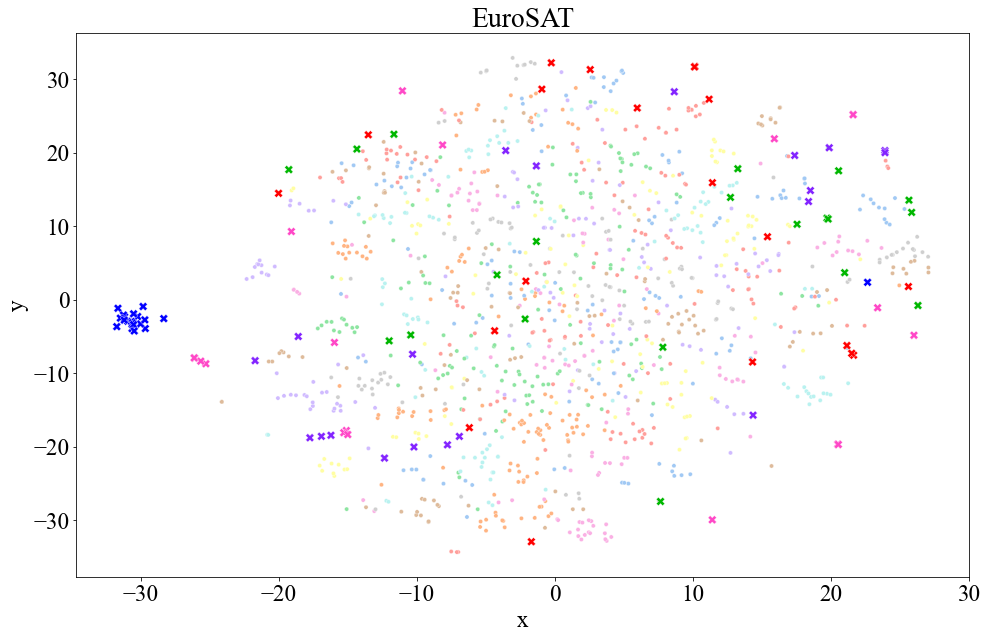

/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


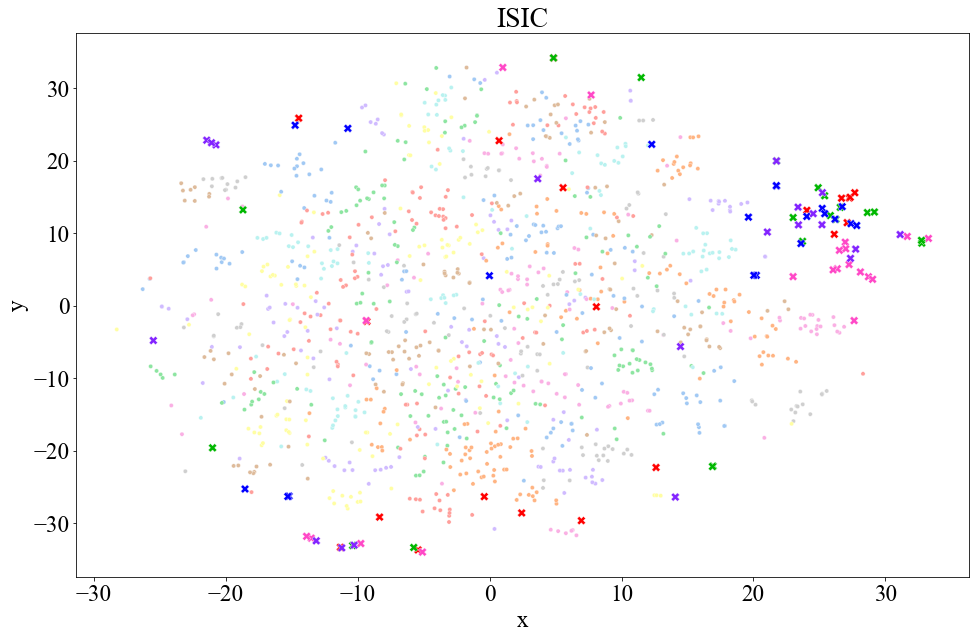

/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(

KeyboardInterrupt



In [374]:
# #f, axes = plt.subplots(2,3, figsize=(30,20))
# row=0
# col=0

# # source
# source_feature_path = './feature/miniImageNet/baseline/source_all_df.csv'
# df_source = pd.read_csv(source_feature_path, index_col='Unnamed: 0')
# df_source.columns = list(range(512))
# df_source['label'] = np.repeat(np.arange(0, 64), 20)
# df_source['class'] = 30
# df_source['data'] = 'miniImageNet'

# df = df_source

#         #clean support 
n_cls = 0
for data in datas_full_name: 
    df_support = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    support_feature_path = './feature/{}/baseline/support.npy'.format(data)
    support_feature = np.load(support_feature_path)
    for i in range(1, 101):
        df_support.loc[i,:] = support_feature[i-1]

    mu = df_support.mean()
    std = ((df_support - mu)**2).mean()
    normalized_df = (df_support - mu )/std
    normalized_df['label'] = np.repeat(np.arange(64 + n_cls, 64 + n_cls + 5), 20)
    normalized_df['class'] = 60
    normalized_df['data'] = data

    df = pd.concat([df_source, normalized_df], axis=0, join='inner')
    n_cls = n_cls+5

    data_subset = df.iloc[:, :512].values

    tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)

    df['x'] = tsne_results[:,0]
    df['y'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=list(sns.color_palette("pastel", 64)) + ["#FF0000"] + ["#FF48C7"] + ["#00B700"] + ["#0100FF"] + ["#8324FF"],
        #palette=list(sns.color_palette("pastel", 64))+list(sns.color_palette("bright", 5))+list(sns.color_palette("dark", 5))+ list(sns.color_palette("muted", 5)) +list(sns.color_palette("Paired", 5))+list(sns.color_palette("Set2", 5)),
        style = "class",
        data=df,
        size = 'class',
        legend= False,
        #ax=axes[row,col],
    )
    # for idx in range(5):
    #      plt.text(df.iloc[-1 - idx*100].x + 0.2, df.iloc[-1 - idx*100].y, df.iloc[-1- idx*100].data, horizontalalignment='left', size='medium', color='black')
    #plt.savefig('./img_pdf/tSNE/support_query_diff/flip/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(data)
    col=col+1
    if col != col%3:
        row=row + 1
    col = col%3
    plt.show()

In [419]:
sns.color_palette("bright", 5)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215)]

In [420]:
sns.color_palette("pastel", 5)

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0)]

In [422]:
sns.color_palette("deep", 5)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)]

### Flip


miniImageNet_test

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 4.724964


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.891304
[t-SNE] KL divergence after 1000 iterations: 0.486361


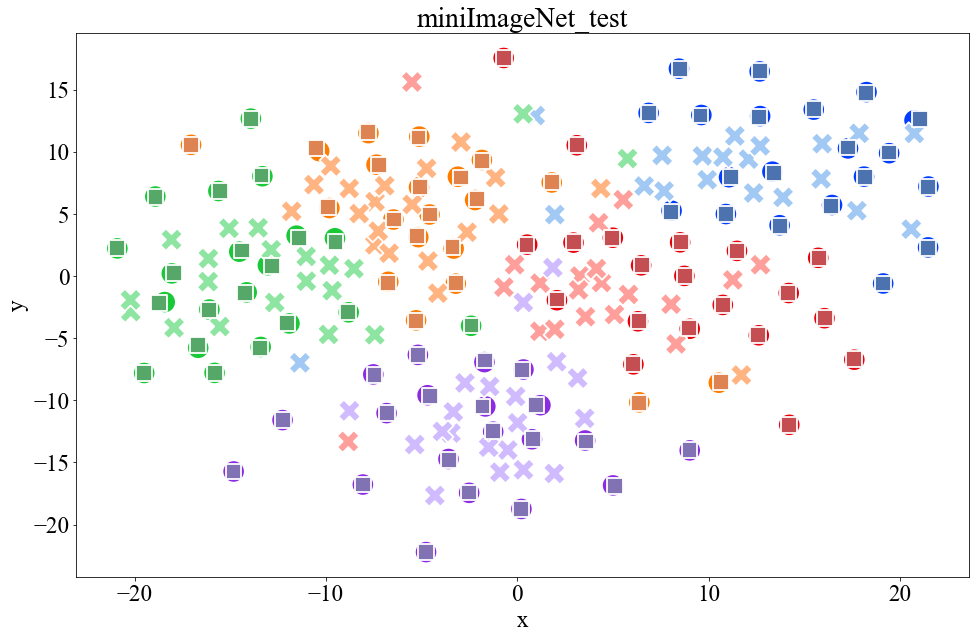


CropDisease

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.097773


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.530376
[t-SNE] KL divergence after 1000 iterations: 0.448418


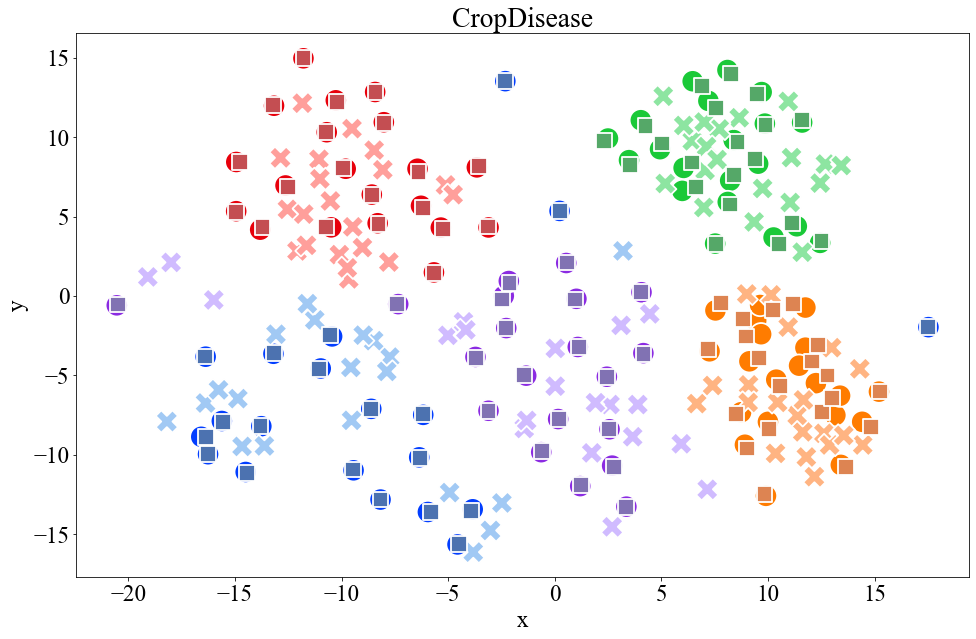


EuroSAT

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.264896


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.280388
[t-SNE] KL divergence after 950 iterations: 0.393587


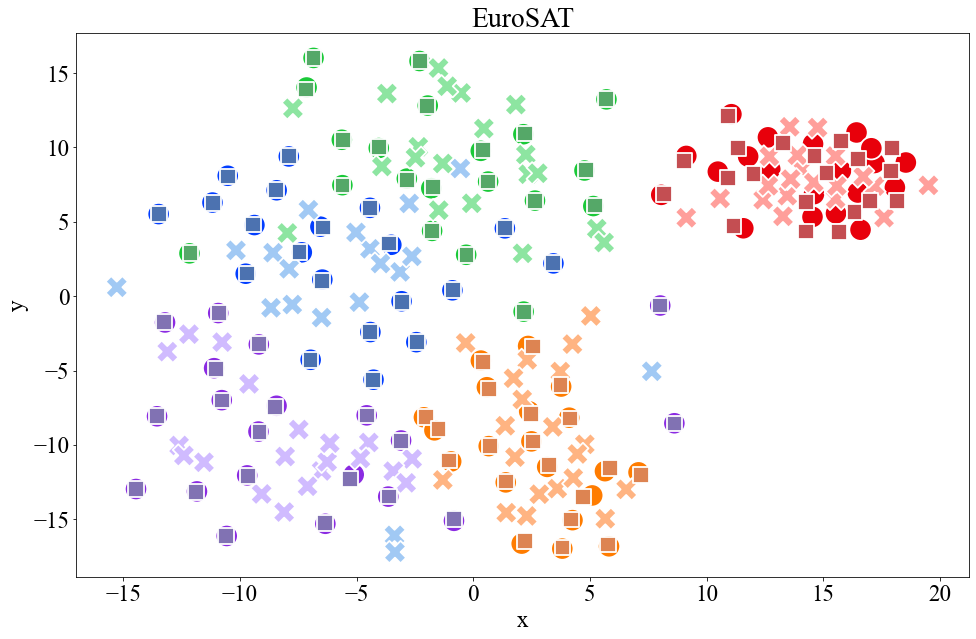


ISIC

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 2.994139


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.079998
[t-SNE] KL divergence after 1000 iterations: 0.547443


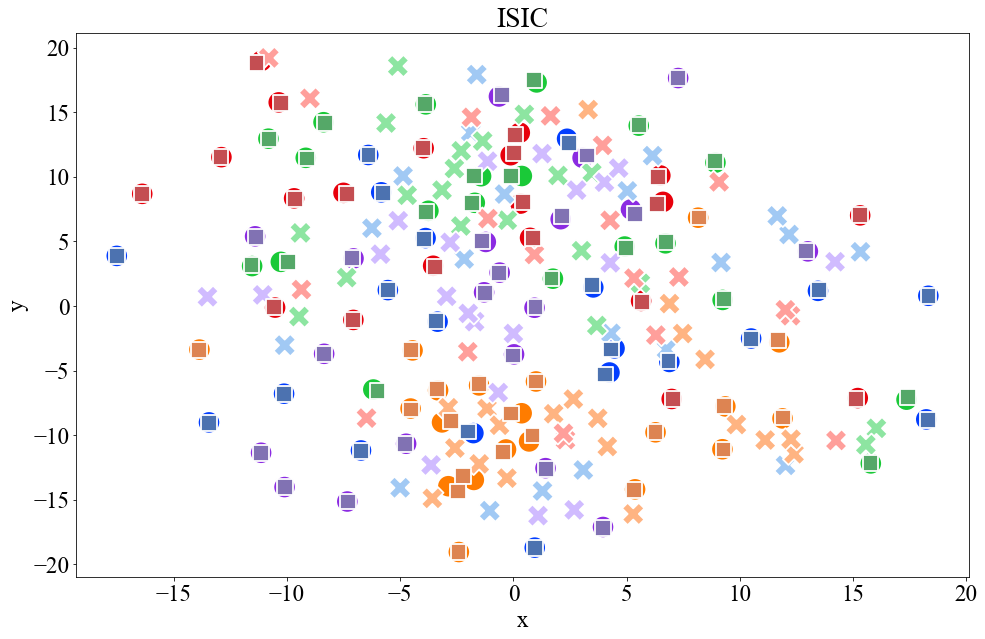


ChestX

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 2.322961


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.093498
[t-SNE] KL divergence after 1000 iterations: 0.639360


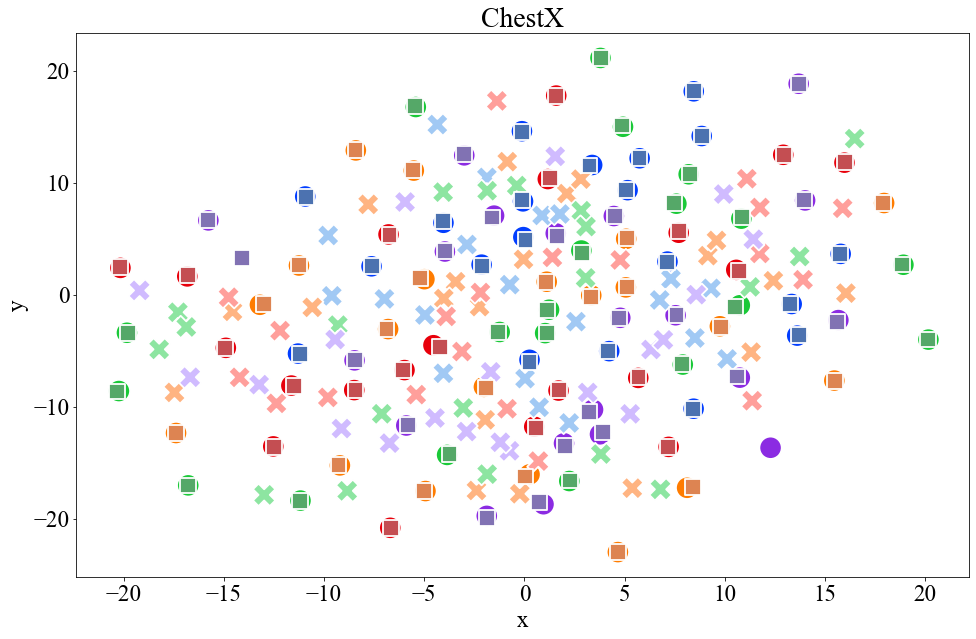

In [423]:
# f, axes = plt.subplots(2,3, figsize=(30,20))
row=0
col=0
for data in datas_full_name: 
    print("\n{}\n".format(data))
    # # source
    # source_feature_path = './feature/miniImageNet/baseline/source_df.csv'
    # df_source = pd.read_csv(source_feature_path, index_col='Unnamed: 0')
    # df_source.columns = list(range(512))
    # df_source['label'] = np.repeat(np.arange(5, 10), 20)
    # df_source['class'] = 'source'

    # clean support 
    df_support = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    support_feature_path = './feature/{}/baseline/support.npy'.format(data)
    support_feature = np.load(support_feature_path)
    for i in range(1, 101):
        df_support.loc[i,:] = support_feature[i-1]
    df_support['label'] = np.repeat(np.arange(5), 20)
    df_support['class'] = 'support'

    # query
    df_query = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    query_feature_path = './feature/{}/baseline/query.npy'.format(data)
    query_feature = np.load(query_feature_path)
    for i in range(1, 101):
        df_query.loc[i,:] = query_feature[i-1]
    df_query['label'] = np.repeat(np.arange(5,10), 20)
    df_query['class'] = 'query'

#     # mixup
#     df_mixup = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     mixup_feature_path = './feature/{}/mixup/support.npy'.format(data)
#     mixup_feature = np.load(mixup_feature_path)
#     for i in range(1, 101):
#         df_mixup.loc[i,:] = mixup_feature[i-1]
#     df_mixup['label'] = np.repeat(np.arange(5), 20)
#     df_mixup['class'] = 'support'

#     # cutmix
#     df_cutmix = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     cutmix_feature_path = './feature/{}/cutmix/support.npy'.format(data)
#     cutmix_feature = np.load(cutmix_feature_path)
#     for i in range(1, 101):
#         df_cutmix.loc[i,:] = cutmix_feature[i-1]
#     df_cutmix['label'] = np.repeat(np.arange(5), 20)
#     df_cutmix['class'] = 'target'

    # flip
    df_flip = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    flip_feature_path = './feature/{}/flip/support.npy'.format(data)
    flip_feature = np.load(flip_feature_path)
    for i in range(1, 101):
        df_flip.loc[i,:] = flip_feature[i-1]
    df_flip['label'] = np.repeat(np.arange(10, 15), 20)
    df_flip['class'] = 'flip'
    
#     # crop
#     df_crop = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     crop_feature_path = './feature/{}/crop/support.npy'.format(data)
#     crop_feature = np.load(crop_feature_path)
#     for i in range(1, 101):
#         df_crop.loc[i,:] = crop_feature[i-1]
#     df_crop['label'] = np.repeat(np.arange(5), 20)
#     df_crop['class'] = 'target'
    
    df = pd.concat([df_support, df_query, df_flip], axis=0, join='inner')
    data_subset = df.iloc[:, :512].values
    data_subset.shape
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)
    
    df['x'] = tsne_results[:,0]
    df['y'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=list(sns.color_palette('bright',5)) + list(sns.color_palette('pastel',5)) + list(sns.color_palette('deep',5)), 
        style = "class",
        data=df,
        s = 500,
        legend=False,
        #ax=axes[row,col]
    )
    #plt.legend(labels = ['target', 'source'],loc = 2, bbox_to_anchor = (1,1))
    col=col+1
    if col != col%3:
        row=row + 1
    col = col%3
    plt.title(data)
    plt.savefig('./img_pdf/tSNE/support_query_diff/flip/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    plt.show()

In [407]:
df_flip

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,label,class
1,0.043922,0.425191,0.12416,0.189813,1.599746,0.154387,0.436487,0.17247,1.029241,0.296105,...,0.314066,0.013746,0.247488,0.556563,0.351793,0.742497,0.496008,0.94108,0,flip
2,0.466825,0.91701,0.364652,0.28237,0.756719,0.250693,0.772398,0.249136,1.014775,0.879172,...,0.932981,0.058574,0.139962,0.698808,0.306304,0.532675,0.490388,0.44185,0,flip
3,0.782751,0.301128,0.187511,0.30678,1.117224,0.171759,0.356835,0.242742,0.750553,0.571039,...,0.248739,0.12054,0.198035,0.43255,0.146673,0.771567,0.173759,0.993438,0,flip
4,0.430386,0.626521,0.431645,0.545855,0.852278,0.637775,0.141694,0.662565,0.48206,0.751619,...,0.326869,0.024873,0.248012,0.264481,0.202148,0.665678,0.130432,0.931244,0,flip
5,0.64485,0.131315,0.194059,0.458067,1.324159,0.110569,0.186978,0.220564,1.005156,0.939045,...,0.226951,0.011204,0.33962,0.474536,0.033708,0.699078,0.399114,0.61975,0,flip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.144449,0.549505,0.476334,0.400512,0.910794,0.282124,0.531814,0.245034,0.54208,0.636557,...,0.23459,0.003781,0.175988,0.232949,0.040538,1.313347,0.431409,0.471765,4,flip
97,0.155846,0.609535,0.430242,0.09174,0.096699,0.267221,0.077387,0.375699,0.505246,0.712262,...,0.117401,0.167137,0.538504,0.320787,0.148333,1.268734,0.300166,0.668148,4,flip
98,0.133844,0.265915,0.484624,0.278662,1.086944,0.396987,0.249303,0.213577,0.836836,0.292267,...,0.060313,0.065704,0.371604,0.551704,0.013878,0.264673,0.310102,0.282713,4,flip
99,0.120563,0.465808,0.32778,0.246632,1.31224,0.244414,0.544884,0.233204,0.562445,0.363176,...,0.200949,0.091881,0.607512,0.275684,0.24325,0.435398,0.316938,0.708088,4,flip


In [436]:
from scipy.stats.stats import pearsonr
pearsonr(df_flip[0], df_support[0])
# coefficient, p-value

(0.8310465510655622, 1.0387838496258772e-26)

In [427]:
df_flip[0]

1      0.043922
2      0.466825
3      0.782751
4      0.430386
5       0.64485
         ...   
96     0.144449
97     0.155846
98     0.133844
99     0.120563
100    0.007281
Name: 0, Length: 100, dtype: object

In [429]:
df_support[0]

1      0.108338
2      0.341413
3      0.606556
4      0.651289
5      0.685178
         ...   
96     0.138191
97     0.166325
98     0.140831
99     0.358623
100    0.078771
Name: 0, Length: 100, dtype: object

In [408]:
df.loc[df['class']=='support'].x

1     -12.366545
2       7.348372
3       3.338220
4       3.688173
5      -3.852352
         ...    
96      7.602030
97      2.638576
98     -7.994372
99      2.661064
100    -6.003545
Name: x, Length: 100, dtype: float32

In [409]:
df.loc[df['class']=='flip'].x

1     -12.425717
2       7.376122
3       3.362401
4       3.670547
5      -3.870670
         ...    
96      7.590773
97      2.624136
98     -7.997778
99      2.682560
100    -5.944075
Name: x, Length: 100, dtype: float32

In [403]:
df.loc[df['class']=='support'].x

1      -7.564859
2     -11.594897
3       4.438391
4       2.320229
5      -9.486645
         ...    
96    -13.476557
97     11.083584
98     12.231270
99     -4.915324
100    -8.681237
Name: x, Length: 100, dtype: float32

In [404]:
df.loc[df['class']=='flip'].x

1      -7.581115
2     -11.663124
3       4.429117
4       2.343977
5      -9.535856
         ...    
96    -13.602812
97     11.079674
98     12.050231
99     -4.993157
100    -8.578007
Name: x, Length: 100, dtype: float32


miniImageNet_test

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 4.266612


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.170433
[t-SNE] KL divergence after 1000 iterations: 0.586975


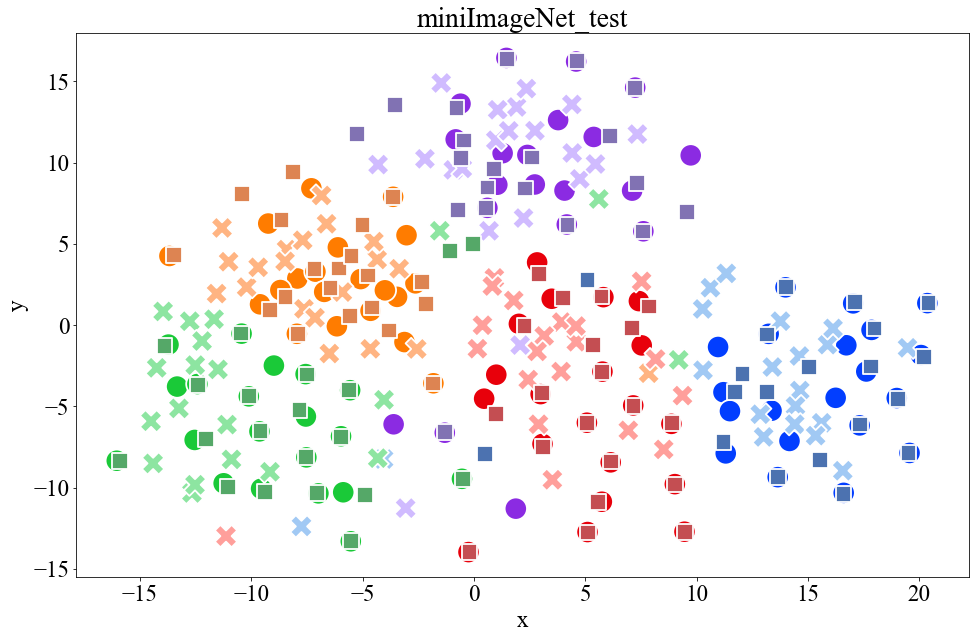


CropDisease

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 2.979574


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.659058
[t-SNE] KL divergence after 1000 iterations: 0.644122


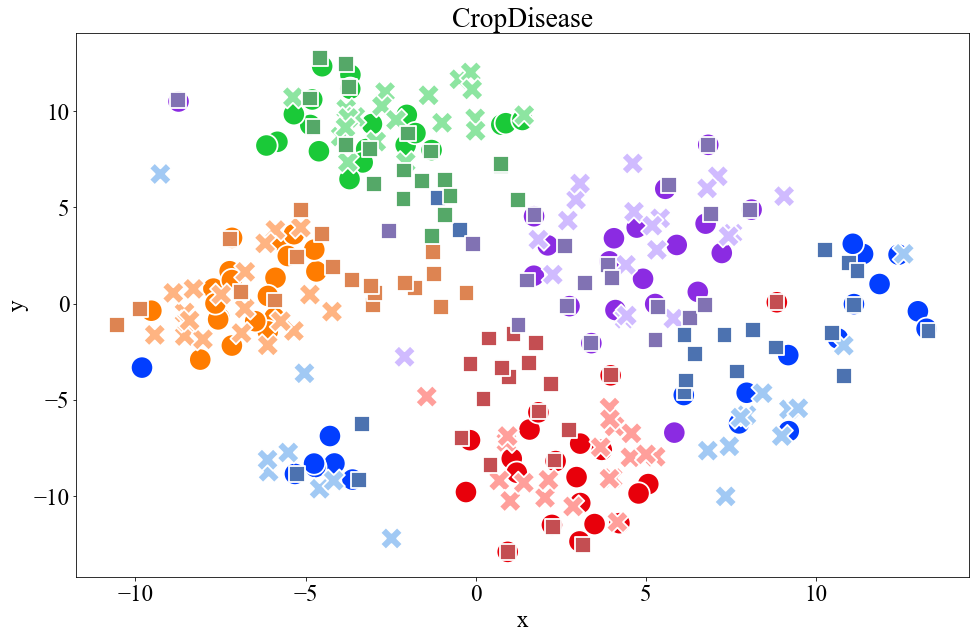


EuroSAT

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.001s...
[t-SNE] Computed neighbors for 300 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 3.048389


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.958900
[t-SNE] KL divergence after 1000 iterations: 0.520458


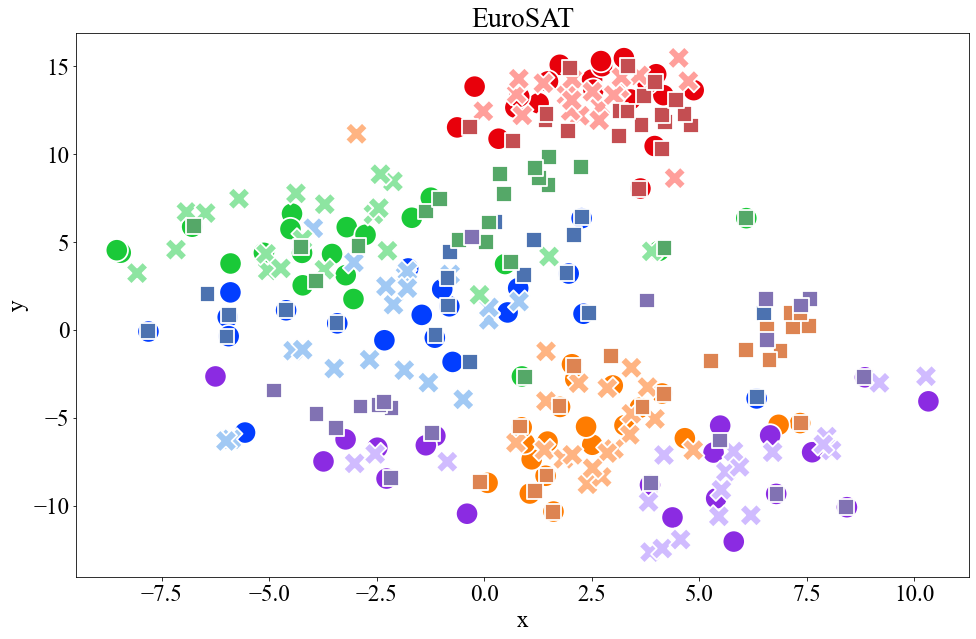


ISIC

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 2.773049


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.835186
[t-SNE] KL divergence after 1000 iterations: 0.734679


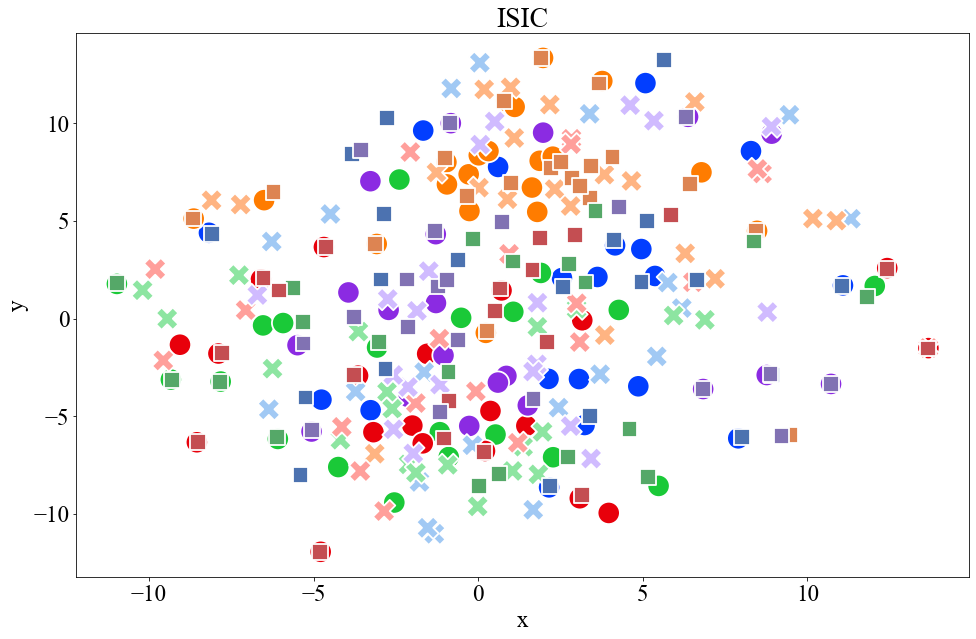


ChestX

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 2.173447


/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yujin/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.128502
[t-SNE] KL divergence after 1000 iterations: 0.761736


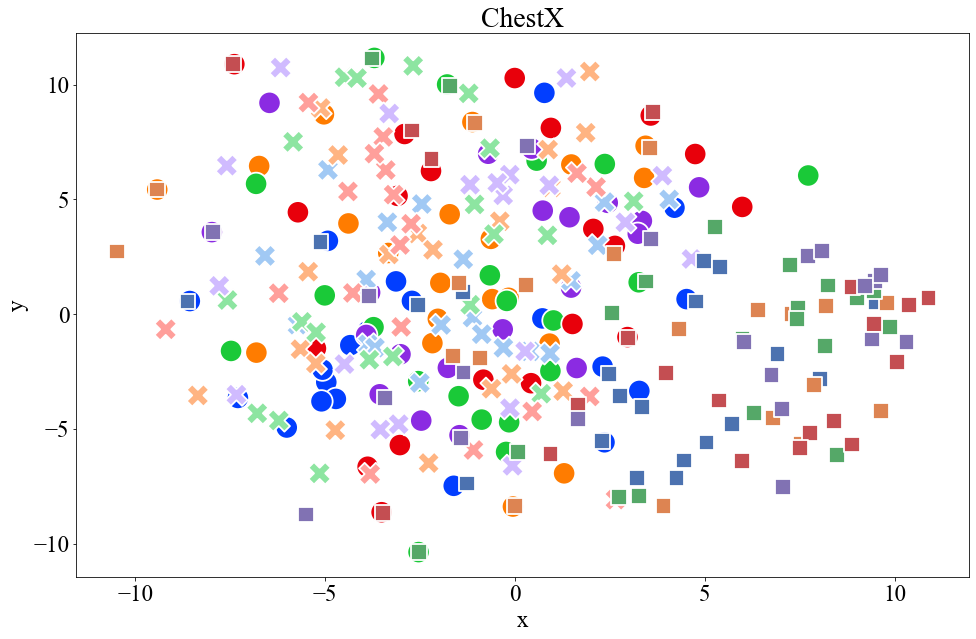

In [424]:
# f, axes = plt.subplots(2,3, figsize=(30,20))
row=0
col=0
for data in datas_full_name: 
    print("\n{}\n".format(data))
    # # source
    # source_feature_path = './feature/miniImageNet/baseline/source_df.csv'
    # df_source = pd.read_csv(source_feature_path, index_col='Unnamed: 0')
    # df_source.columns = list(range(512))
    # df_source['label'] = np.repeat(np.arange(5, 10), 20)
    # df_source['class'] = 'source'

    # clean support 
    df_support = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    support_feature_path = './feature/{}/baseline/support.npy'.format(data)
    support_feature = np.load(support_feature_path)
    for i in range(1, 101):
        df_support.loc[i,:] = support_feature[i-1]
    df_support['label'] = np.repeat(np.arange(5), 20)
    df_support['class'] = 'support'

    # query
    df_query = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    query_feature_path = './feature/{}/baseline/query.npy'.format(data)
    query_feature = np.load(query_feature_path)
    for i in range(1, 101):
        df_query.loc[i,:] = query_feature[i-1]
    df_query['label'] = np.repeat(np.arange(5, 10), 20)
    df_query['class'] = 'query'

#     # mixup
#     df_mixup = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     mixup_feature_path = './feature/{}/mixup/support.npy'.format(data)
#     mixup_feature = np.load(mixup_feature_path)
#     for i in range(1, 101):
#         df_mixup.loc[i,:] = mixup_feature[i-1]
#     df_mixup['label'] = np.repeat(np.arange(5), 20)
#     df_mixup['class'] = 'support'

#     # cutmix
#     df_cutmix = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
#     cutmix_feature_path = './feature/{}/cutmix/support.npy'.format(data)
#     cutmix_feature = np.load(cutmix_feature_path)
#     for i in range(1, 101):
#         df_cutmix.loc[i,:] = cutmix_feature[i-1]
#     df_cutmix['label'] = np.repeat(np.arange(5), 20)
#     df_cutmix['class'] = 'target'

    # # flip
    # df_flip = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    # flip_feature_path = './feature/{}/flip/support.npy'.format(data)
    # flip_feature = np.load(flip_feature_path)
    # for i in range(1, 101):
    #     df_flip.loc[i,:] = flip_feature[i-1]
    # df_flip['label'] = np.repeat(np.arange(5), 20)
    # df_flip['class'] = 'flip'
    
    # crop
    df_crop = pd.DataFrame(None, index=list(range(1, 101)), columns=list(range(512)))
    crop_feature_path = './feature/{}/crop/support.npy'.format(data)
    crop_feature = np.load(crop_feature_path)
    for i in range(1, 101):
        df_crop.loc[i,:] = crop_feature[i-1]
    df_crop['label'] = np.repeat(np.arange(10, 15), 20)
    df_crop['class'] = 'crop'
    
    df = pd.concat([df_support, df_query, df_crop], axis=0, join='inner')
    data_subset = df.iloc[:, :512].values
    data_subset.shape
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)
    
    df['x'] = tsne_results[:,0]
    df['y'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        palette=list(sns.color_palette('bright',5)) + list(sns.color_palette('pastel',5)) + list(sns.color_palette('deep',5)), 
        style = "class",
        data=df,
        s = 500,
        legend=False,
        #ax=axes[row,col]
    )
    #plt.legend(labels = ['target', 'source'],loc = 2, bbox_to_anchor = (1,1))
    col=col+1
    if col != col%3:
        row=row + 1
    col = col%3
    plt.title(data)
    plt.savefig('./img_pdf/tSNE/support_query_diff/crop/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    plt.show()